In [8]:
# !pip install selenium

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

from urllib.request import urlretrieve

import requests
import numpy as np
import pandas as pd

import os

### 크롤링 시작

In [5]:
url = "https://store.musinsa.com/app/codimap/lists"
res = requests.get(url)
print("응답코드 : ", res.status_code)

응답코드 :  403


응답코드 = 200 이면 크롤링 가능 (이나 403이어도 에러 안뜨면 가능...)

In [6]:
options = Options()

options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

path ='C:\\YOUR_CHROMEDRIVER_DIRECTORY' # 크롬 드라이버의 위치
driver = webdriver.Chrome(path, options=options)

## 1페이지 크롤링 시도

In [7]:
# 다중 페이지 크롤링을 위한 포맷
driver.get("https://store.musinsa.com/app/codimap/lists?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page="+str(1))

In [9]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
print(soup)

<html lang="ko"><head><style class="vjs-styles-defaults">
      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
    </style>
<!-- Google Tag Manager -->
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/240753852943871?v=2.9.55&amp;r=stable"></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script async="" src="https://static.msscdn.net/static/ds/like/1.0.0/likeCollect.js?202202112005" type="text/javascript"></script><script async="" gtm="GTM-TXDSFSF" src="https://www.google-analytics.com/gtm/optimize.js?id=GTM-57WK7WD" type="text/javascript"></script><script async="" src="https://www.googleadservices.com/pagead/conversion_async.js" type="text/javascript"></script><script async="" charset="UTF-8" src="https://cdn.channel.io/plugin/ch-plugin-web.js" type="text/j

In [10]:
item = soup.find("div", attrs={"class":"right_contents hover_box"})
imgs = item.find_all("img")
print(imgs)

[<img alt="세련된 연출" class="style-list-thumbnail__img" src="//image.msscdn.net/images/codimap/list/l_3_2022030314022100000013010.jpg?202203071903"/>, <img alt="핑크 포인트" class="style-list-thumbnail__img" src="//image.msscdn.net/images/codimap/list/l_3_2022030314003900000003023.jpg?202203071903"/>, <img alt="러블리한 조합" class="style-list-thumbnail__img" src="//image.msscdn.net/images/codimap/list/l_3_2022030313585500000037497.jpg?202203071903"/>, <img alt="센스 넘쳐" class="style-list-thumbnail__img" src="//image.msscdn.net/images/codimap/list/l_3_2022030313565700000051359.jpg?202203071903"/>, <img alt="편한 게 최고" class="style-list-thumbnail__img" src="//image.msscdn.net/images/codimap/list/l_3_2022030313553000000038897.jpg?202203071903"/>, <img alt="단정한 매력" class="style-list-thumbnail__img" src="//image.msscdn.net/images/codimap/list/l_3_2022030313530200000017904.jpg?202203071903"/>, <img alt="스트릿 코디" class="style-list-thumbnail__img" src="//image.msscdn.net/images/codimap/list/l_3_2022030313512000

In [11]:
# 페이지당 사진 개수
len(imgs)

60

In [19]:
# 데이터셋 다운로드할 경로 지정
os.chdir('C:\\YOUR_DIRECTORY')

In [12]:
## 필요한 url이 src와 data-original 두 attribute에 나뉘어있음
# data-original attr에 url 있고 scr에 data:image로 시작하는 불필요한 정보가 있거나
# scr attr만 존재해 거기에 url이 있거나

for i in imgs:
    try:
        url = i.attrs['data-original']
        print(url)
    except:
        url = i.attrs['src']
        print(url)

//image.msscdn.net/images/codimap/list/l_3_2022030314022100000013010.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030314003900000003023.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030313585500000037497.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030313565700000051359.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030313553000000038897.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030313530200000017904.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030313512000000027168.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030312194200000084206.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030312183200000047383.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030312173200000088394.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_2022030311545700000030484.jpg?202203071903
//image.msscdn.net/images/codimap/list/l_3_20220303114

In [13]:
# url을 이용한 이미지 저장

count = 1

for i in imgs:
    try:
        url = i.attrs['data-original']
        urlretrieve("http:" + url, "musinsa_codimap_" + str(count) + ".jpg")
        count += 1
    except:
        url = i.attrs['src']
        urlretrieve("http:" + url, "musinsa_codimap_" + str(count) + ".jpg")
        count += 1

In [20]:
driver.close()

__크롤링 결과 스크린샷__
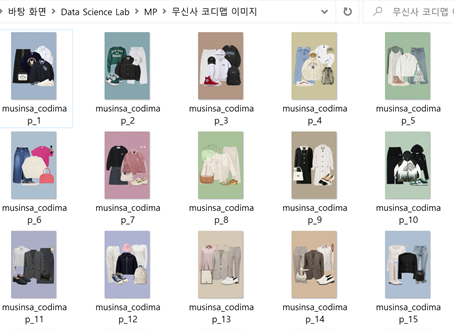

## 전체 페이지 크롤링

In [18]:
# 데이터셋 다운로드할 경로 지정
os.chdir('C:\\YOUR_DIRECTORY')

In [17]:
page = 1
count = 1

while True:
    driver.get("https://store.musinsa.com/app/codimap/lists?style_type=&tag_no=&brand=&display_cnt=60&list_kind=big&sort=date&page=" + str(page))
    time.sleep(2)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    item = soup.find("div", attrs={"class":"right_contents hover_box"})
    imgs = item.find_all("img")

    for i in imgs:
        try:
            url = i.attrs['data-original']
            urlretrieve("http:" + url, "musinsa_codimap_" + str(count) + ".jpg")
            count += 1
        except:
            url = i.attrs['src']
            urlretrieve("http:" + url, "musinsa_codimap_" + str(count) + ".jpg")
            count += 1
    
    time.sleep(2)
    page += 1
    
# 작업이 종료되면 드라이버도 종료
driver.close()

KeyboardInterrupt: 

1020번째까지(17페이지) 다운받아 코드 잘 돌아가는 것 확인함 위대로 쓰면 될 듯